# Regresión lineal: predecir los gastos médicos de pacientes
---

Para este ejercicio utilizaremos los datos presentados en [este](https://www.kaggle.com/mirichoi0218/insurance) dataset de Kaggle en el cual se presentan datos de seguros médicos. 


## Descarga e instalación de librerías

Lo primero que se hará es descargar la librería **[regressors](https://pypi.org/project/regressors/)** que ayudará a hacer un análisis más profundo sobre la regresión lineal.

In [1]:
import pandas as pd 
import seaborn as sns 
sns.set(style='whitegrid', context = 'notebook')
import matplotlib.pyplot as plt
import numpy as np


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

In [28]:
#pip install setuptools==58
#pip install regressors

     -------------------------------------- 816.3/816.3 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 58.0.4
    Uninstalling setuptools-58.0.4:
      Successfully uninstalled setuptools-58.0.4
Note: you may need to restart the kernel to use updated packages.


In [34]:
from regressors import stats

## Descargando los datos
Descarguemos los datos y veamos cómo se ven.

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analizando los datos
Se observará cómo se distribuyen los datos de la variable a predecir.

(1338, 7)


<AxesSubplot:>

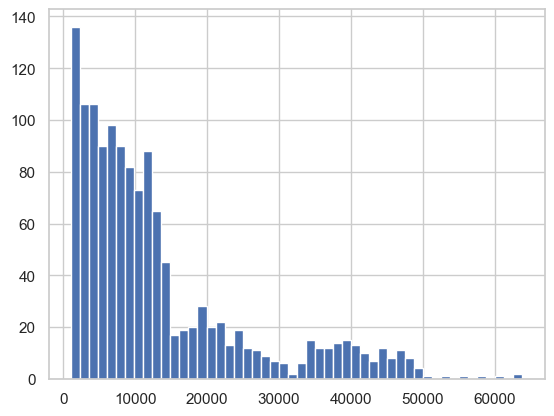

In [4]:
print(df.shape)
df.charges.hist(bins=50)

Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

In [5]:
df[df.charges>50000] 

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


En este caso, al ser pocos datos (6 de 1338), eliminaremos estos datos atípicos. A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio. 

Sin embargo es importante aclarar que **NO SE DEBEN ELIMINAR** datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos.

## Viendo correlaciones
Ahora entendamos nuestros datos, viendo cómo se distribuyen y correlacionan. 

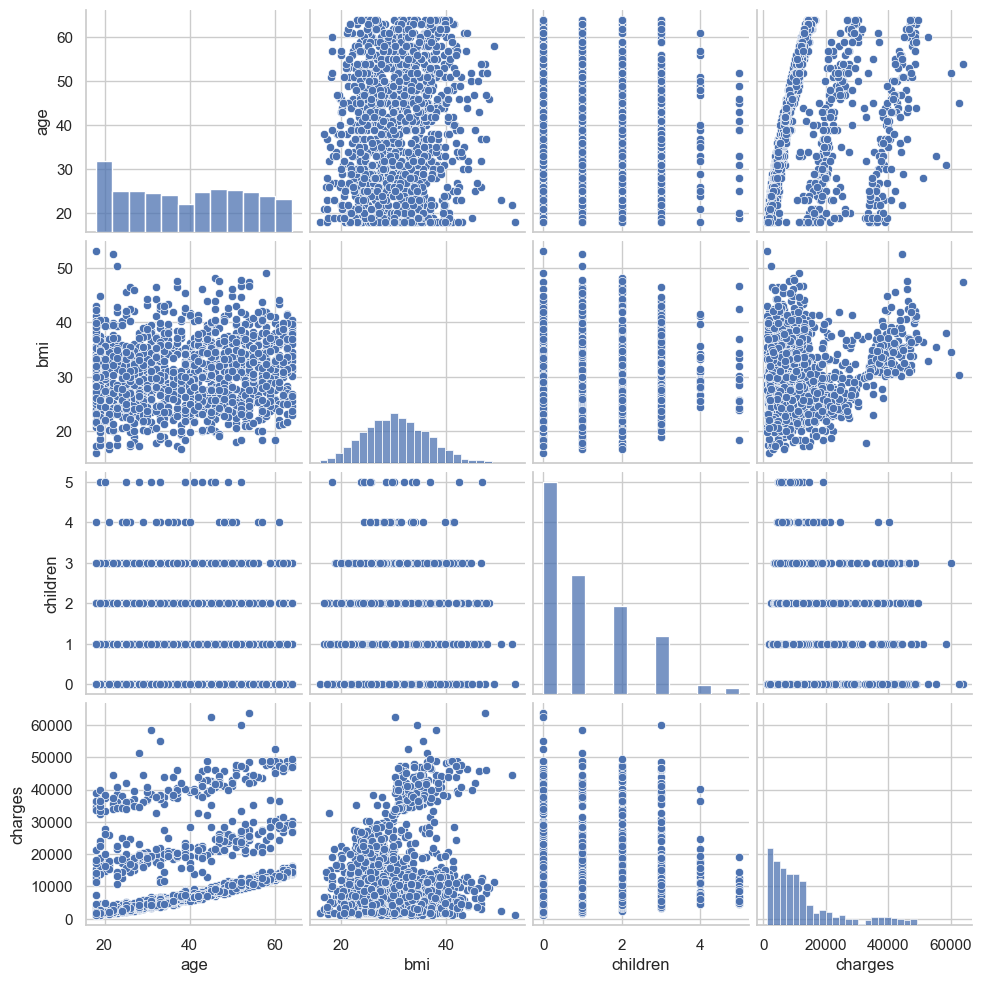

In [6]:
sns.pairplot(df, height=2.5)
plt.show()

Puntos interesantes a ver:

- Hay 3 grupos de personas diferentes que se clasifican en edad / cargos, esto puede ser un punto a analizar después.

En general los valores se distribuyen de manera esperada. Con valores extremos en el caso de los cargos, sin embargo esto es de esperarse pues los cargos en los hospitales pueden variar mucho por quedarse un día más en el hospital o incluso por procedimientos extras.

- Parece que los datos están limpios, la variable de índice de masa corporal se distribuye de manera normal o gausiana, lo cual sería esperado en un índice de este tipo.

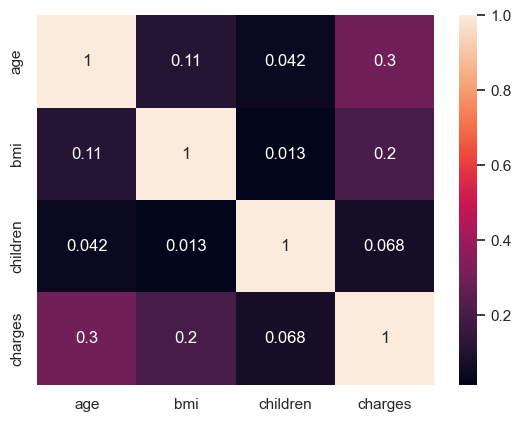

In [7]:
cols = ['age', 'bmi', 'children', 'charges']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1)
sns.heatmap(cm, cbar= True, annot= True, yticklabels=cols, xticklabels=cols)
plt.show()


## Utilizando las demás variables
Las demás variables son variables categoricas, sexo, fumador, región. Para poder utilizarlas utilizaremos la función get_dummies de pandas. 

Ahora la verás en acción

In [8]:
df = pd.get_dummies(df, columns=['sex','smoker','region'], drop_first=True)  #Eliminar variables redundantes)
df.head()
                   

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


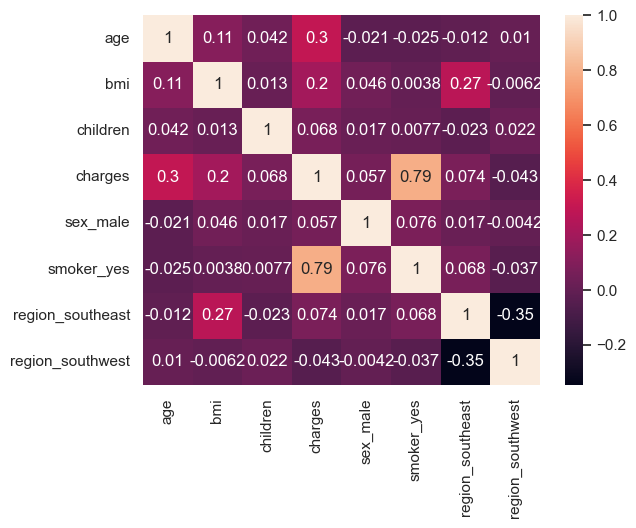

In [9]:
cols = ['age', 'bmi', 'children', 'charges', 'sex_male','smoker_yes','region_southeast','region_southwest']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1)
sns.heatmap(cm, cbar= True, annot= True, yticklabels=cols, xticklabels=cols)
plt.show()


## Creando modelos 
Primero se usará un modelo con todas las variables.

In [12]:
x_cols = list(set(df.columns)-set(['charges']))
y_cols = ['charges']

x = df[x_cols].values
y = df[y_cols].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25)

sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [14]:
y_pred.shape

(335, 1)

## Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

In [27]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print(f"r2: {r2:.4f}\n\nmse: {mse:.4f}")

r2: 0.7400

mse: 0.2369


El siguiente código muestra un resumen general de los resultados.

In [39]:
model.intercept_ = model.intercept_
model.coef_ = model.coef_.reshape(-1)

In [40]:
y_test = y_test.reshape(-1)

print('************** Summary *****************')
stats.summary(model,x_test,y_test,x_cols)

************** Summary *****************
Residuals:
    Min      1Q  Median     3Q    Max
-1.8386 -0.1244  0.0804 0.2251 0.9348


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept       -0.000157    0.026786  -0.0058  0.995341
sex_male         -0.012341    0.026742  -0.4615  0.644748
region_northwest -0.012411    0.029572  -0.4197  0.674982
children          0.051329    0.026877   1.9098  0.057020
bmi               0.171837    0.029627   5.8000  0.000000
region_southeast -0.042377    0.032408  -1.3076  0.191905
smoker_yes        0.805952    0.027228  29.6003  0.000000
age               0.295823    0.026467  11.1772  0.000000
region_southwest -0.032672    0.031739  -1.0294  0.304030
---
R-squared:  0.74004,    Adjusted R-squared:  0.73367
F-statistic: 116.01 on 8 features


Finalmente tenemos la función que calcula los residuales. Es importante notar que es una simple resta entre los valores reales y los predichos.

<function matplotlib.pyplot.show(close=None, block=None)>

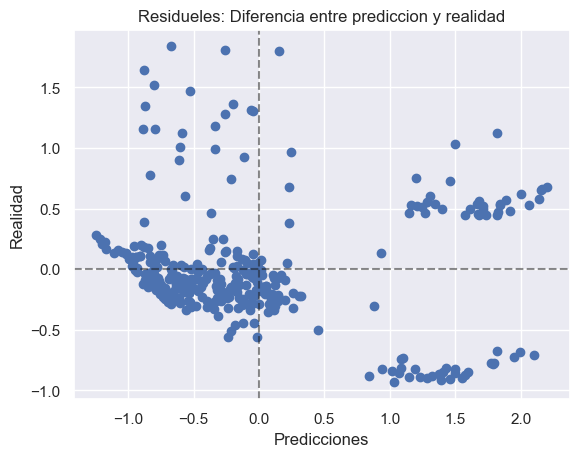

In [42]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.axvline(x = 0, c='k', ls='--', alpha=0.5)
plt.axhline(y = 0, c='k', ls='--', alpha=0.5)
plt.scatter(y_pred, residuals)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
plt.title('Residueles: Diferencia entre prediccion y realidad')
plt.show

## Segundo modelo
Estos resultados de arriba son buenos, pero se pueden mejorar. Intentaremos hacer algunas transformaciones sobre las variables que pueden ser de utilidad.

In [46]:
df_second = df.copy()
df_second['age2'] = df_second.age**2
df_second['sobrepeso'] = (df_second.bmi >= 30).astype(int)
df_second['sobrepeso&fumador'] = df_second.sobrepeso * df_second.smoker_yes


Analizando el segundo modelo

In [48]:
x_cols = list(set(df_second.columns)-set(['charges']))
y_cols = ['charges']

x = df_second[x_cols].values
y = df_second[y_cols].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25)

sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [49]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print(f"r2: {r2:.4f}\n\nmse: {mse:.4f}")

r2: 0.8460

mse: 0.1263


In [54]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [55]:
y_test = y_test.reshape(-1)

print('************** Summary *****************')
stats.summary(model,x_test,y_test,x_cols)

************** Summary *****************
Residuals:
    Min     1Q  Median     3Q    Max
-1.8645 0.0679  0.1026 0.1382 1.4661


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.003978    0.019588   0.2031  0.839205
sex_male          -0.026938    0.019489  -1.3822  0.167834
region_northwest  -0.009900    0.022193  -0.4461  0.655834
age2               0.291301    0.101057   2.8825  0.004200
children           0.064985    0.019072   3.4074  0.000736
sobrepeso         -0.038750    0.031098  -1.2461  0.213616
bmi                0.056141    0.030380   1.8480  0.065492
region_southeast  -0.027280    0.023714  -1.1503  0.250823
sobrepeso&fumador  0.518508    0.029342  17.6709  0.000000
smoker_yes         0.449389    0.027858  16.1312  0.000000
age                0.016974    0.102211   0.1661  0.868201
region_southwest  -0.046784    0.022969  -2.0368  0.042457
---
R-squared:  0.84602,    Adjusted R-squared:  0.84077
F-statistic: 161.33 on 11 features

<function matplotlib.pyplot.show(close=None, block=None)>

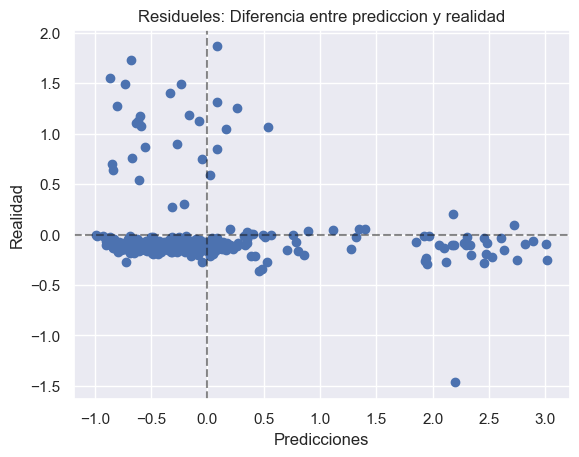

In [53]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.axvline(x = 0, c='k', ls='--', alpha=0.5)
plt.axhline(y = 0, c='k', ls='--', alpha=0.5)
plt.scatter(y_pred, residuals)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
plt.title('Residueles: Diferencia entre prediccion y realidad')
plt.show

### Eliminamos todas las variables con un p-value mayor a 0.05

In [56]:
x_cols = ['age2','children', 'sobrepeso&fumador','smoker_yes']
y_cols = ['charges']

x = df_second[x_cols].values
y = df_second[y_cols].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25)

sc_x = StandardScaler().fit(x)
sc_y = StandardScaler().fit(y)

x_train = sc_x.transform(x_train)
x_test = sc_x.transform(x_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [57]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print(f"r2: {r2:.4f}\n\nmse: {mse:.4f}")

r2: 0.8921

mse: 0.1146


In [58]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [59]:
y_test = y_test.reshape(-1)

print('************** Summary *****************')
stats.summary(model,x_test,y_test,x_cols)

************** Summary *****************
Residuals:
    Min     1Q  Median     3Q   Max
-1.6317 0.0769  0.1132 0.1327 0.406


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.003679    0.018510   0.1988  0.842554
age2               0.301996    0.018241  16.5559  0.000000
children           0.066913    0.017535   3.8159  0.000162
sobrepeso&fumador  0.500289    0.023043  21.7108  0.000000
smoker_yes         0.452882    0.023284  19.4502  0.000000
---
R-squared:  0.89209,    Adjusted R-squared:  0.89078
F-statistic: 682.00 on 4 features


<function matplotlib.pyplot.show(close=None, block=None)>

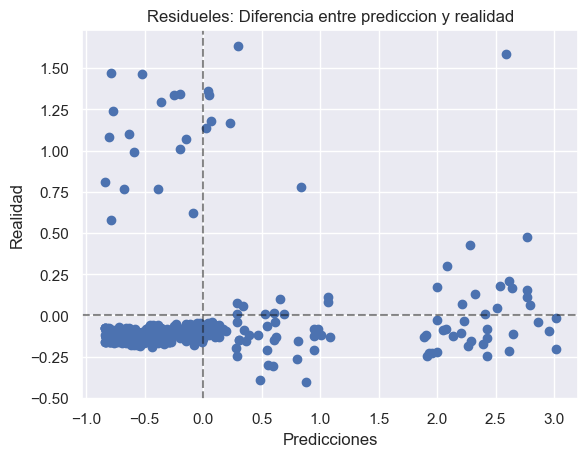

In [60]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.axvline(x = 0, c='k', ls='--', alpha=0.5)
plt.axhline(y = 0, c='k', ls='--', alpha=0.5)
plt.scatter(y_pred, residuals)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
plt.title('Residueles: Diferencia entre prediccion y realidad')
plt.show